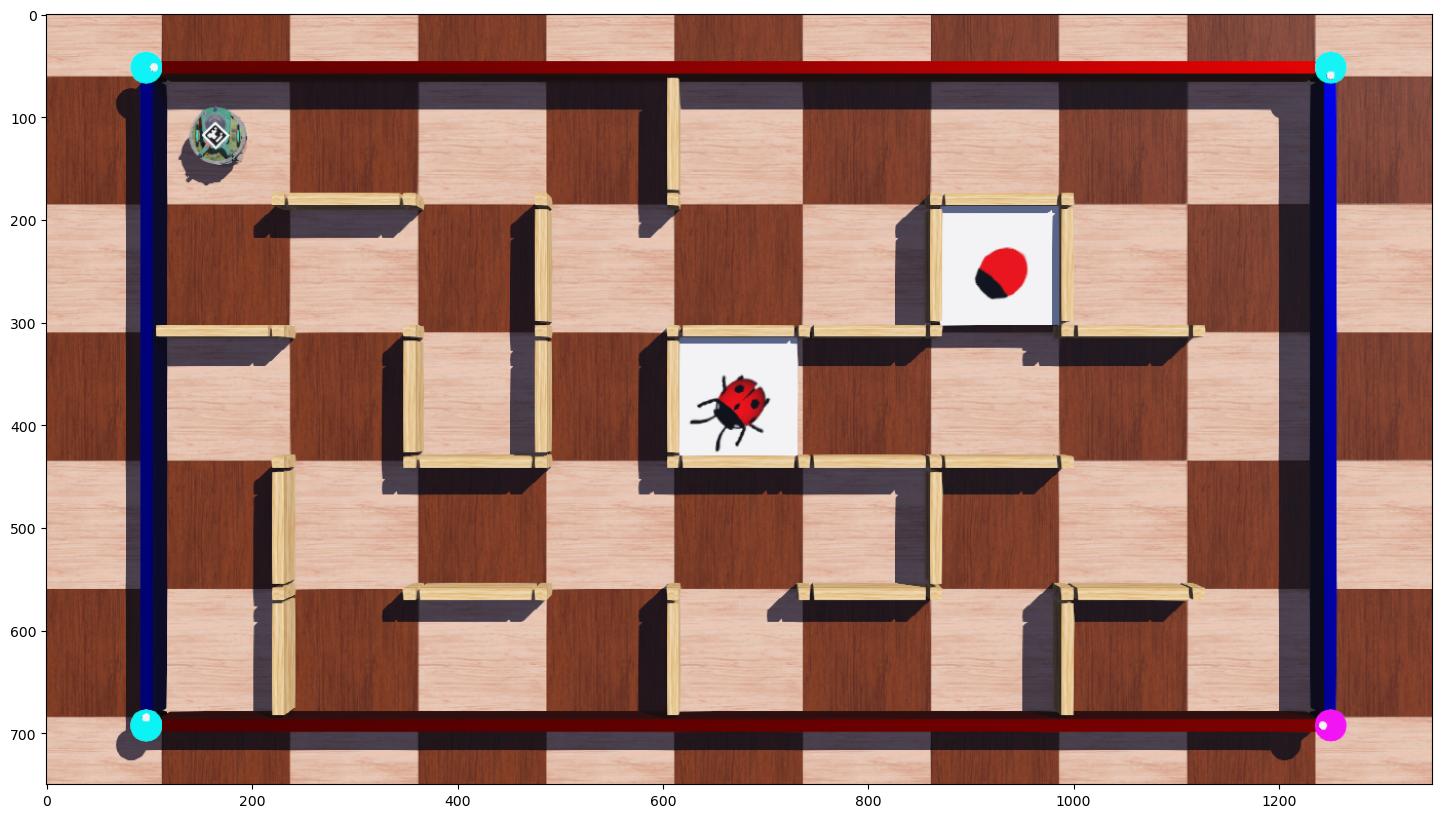

In [64]:
# My zID is z5308946 but I was kinda scared something would break if I renamed the Webots files with my actual zID

import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv

MAZE_FILE_NAME= '../Maze.png'
ROBOT_FILE_NAME= '../Robot.png'
IMAGE_LADYBUG_FILE_NAME= '../Ladybug_small.png'
MAP_FILE_NAME = '../MapBuilt.txt'

# img_transformed is explictly named variable for map after transformation

def round_up_x(pixel):
    if pixel < 400:
        return 0
    if pixel > 1000:
        return 1350
    
def round_up_y(pixel):
    if pixel <= 375:
        return 0
    if pixel > 375:
        return 750

# Code from https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/#:~:text=Make%20use%20of%20Python%20Counter,by%20using%20most_common()%20method.
def most_frequent(List):
    return max(set(List), key = List.count)
    
img = cv2.imread(MAZE_FILE_NAME)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (18,10))
plt.imshow(img_rgb)
plt.show()

x, y, w, h: 82 677 31 32
x, y, w, h: 1236 37 30 31
x, y, w, h: 83 37 30 31
x, y, w, h: 1236 677 30 31


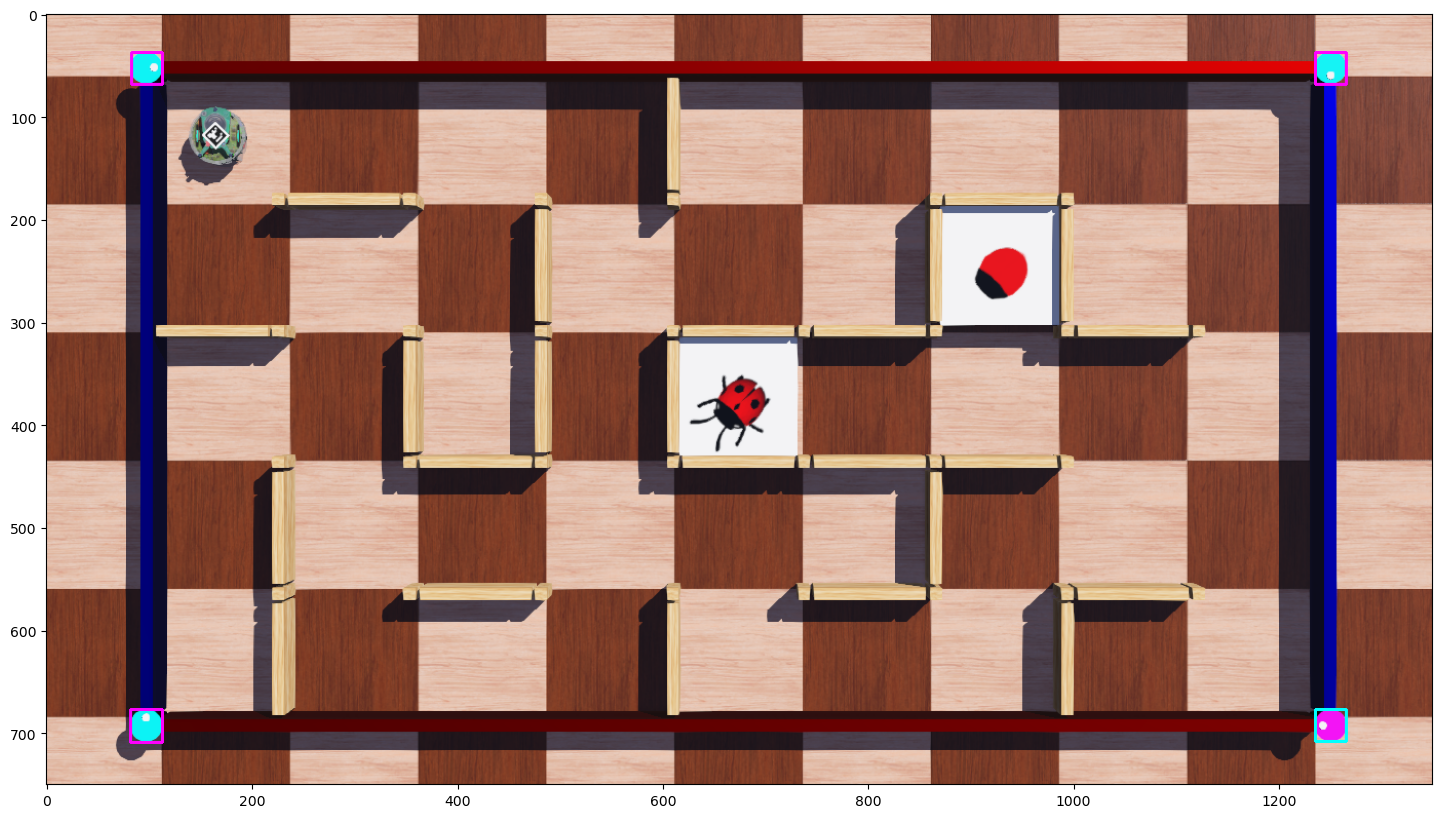

In [65]:
plt.figure(figsize = (18,10))

hsv_corners = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cyan_lower = np.array([70, 200, 0])
cyan_upper = np.array([110, 255, 255])

magenta_lower = np.array([140, 200, 0])
magenta_upper = np.array([160, 255, 255])

maskC = cv2.inRange(hsv_corners, cyan_lower, cyan_upper)
maskM = cv2.inRange(hsv_corners, magenta_lower, magenta_upper)

maskingC = cv2.bitwise_and(hsv_corners, hsv_corners, mask=maskC)
maskingM = cv2.bitwise_and(hsv_corners, hsv_corners, mask=maskM)

RGB_CYAN = (0, 255, 255)
RGB_MAGENTA = (255, 0, 255)

contoursC = cv2.findContours(maskC, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoursC = contoursC[0] if len(contoursC) == 2 else contoursC[1]

contoursM = cv2.findContours(maskM, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoursM = contoursM[0] if len(contoursM) == 2 else contoursM[1]

i = 0
x_coords = [0, 0, 0, 0]
y_coords = [0, 0, 0, 0]
flip = False

for contour in contoursC:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), RGB_MAGENTA, 2)
    print("x, y, w, h:",x,y,w,h)
    if w*h > 25:
        x_coords[i] = x+w/2
        y_coords[i] = y+h/2
        i = i + 1
    
for contour in contoursM:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), RGB_CYAN, 2)
    print("x, y, w, h:",x,y,w,h)
    if w*h > 25:
        x_coords[i] = x+w/2
        y_coords[i] = y+h/2
        i = i + 1
        if x+w/2 < 400:
            flip = True
    
plt.imshow(img_rgb)
plt.show()

[[ 7.79939312e-01  6.08851922e-04 -7.64660173e+01]
 [-3.88578059e-16  7.80954593e-01 -4.10001162e+01]
 [-6.76737184e-07  6.76502135e-07  1.00000000e+00]]


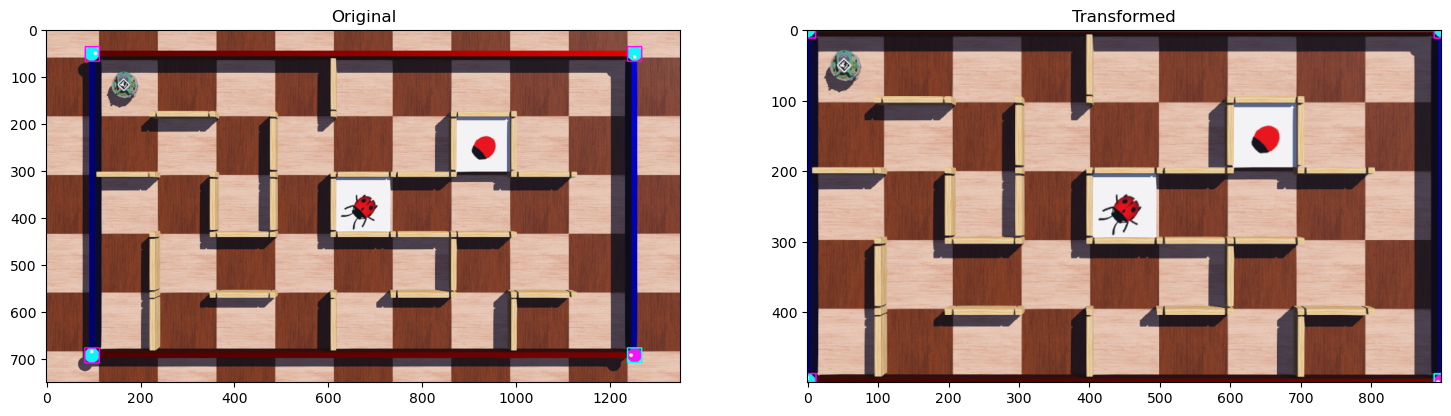

In [66]:
pts1 = np.float32([[x_coords[0],y_coords[0]],[x_coords[1],y_coords[1]],[x_coords[2],y_coords[2]],[x_coords[3],y_coords[3]]]) # four points on the first image
pts2 = np.float32([[0,0],[0,0],[0,0],[0,0]])
if flip == False:
    pts2 = np.float32([[round_up_x(x_coords[0])*900/1350,round_up_y(y_coords[0])*500/750],[round_up_x(x_coords[1])*900/1350,round_up_y(y_coords[1])*500/750],[round_up_x(x_coords[2])*900/1350,round_up_y(y_coords[2])*500/750],[round_up_x(x_coords[3])*900/1350,round_up_y(y_coords[3])*500/750]]) # four points on the second image
if flip == True:
    pts2 = np.float32([[900-round_up_x(x_coords[0])*900/1350,500-round_up_y(y_coords[0])*500/750],[900-round_up_x(x_coords[1])*900/1350,500-round_up_y(y_coords[1])*500/750],[900-round_up_x(x_coords[2])*900/1350,500-round_up_y(y_coords[2])*500/750],[900-round_up_x(x_coords[3])*900/1350,500-round_up_y(y_coords[3])*500/750]]) # four points on the second image

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix
print(H)

dst = cv2.warpPerspective(img_rgb, H, (900,500))
img_tranformed = dst

fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb), ax1.set_title("Original")
ax2.imshow(dst), ax2.set_title("Transformed")
plt.show()

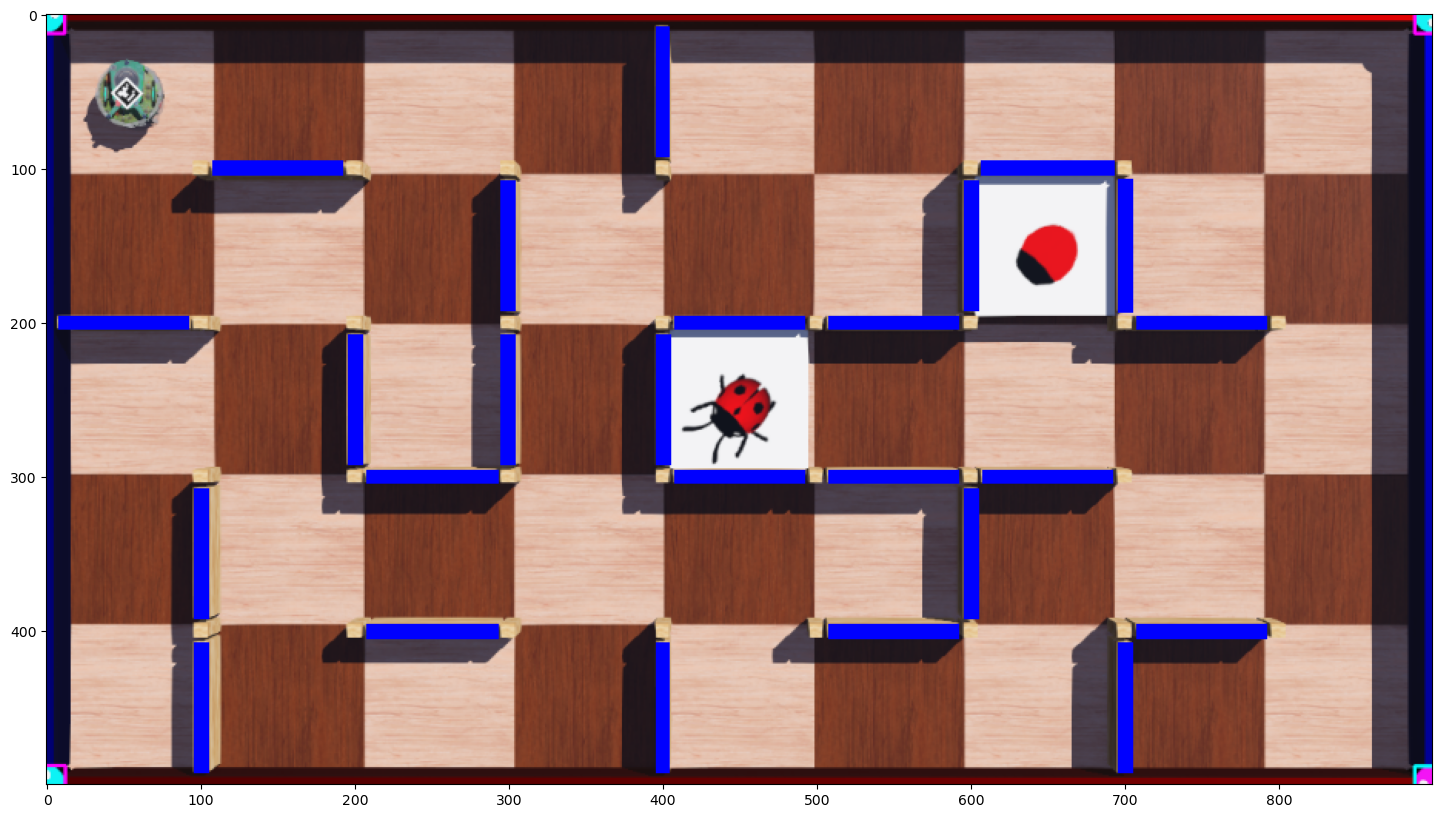

In [67]:
img_hsv = cv2.cvtColor(dst, cv2.COLOR_RGB2HSV)

plt.figure(figsize = (18,10))

lower = np.array([14, 70, 223])
upper = np.array([34, 120, 255])

maskB = cv2.inRange(img_hsv, lower, upper)

maskingB = cv2.bitwise_and(img_hsv, img_hsv, mask=maskB)

RGB_BLUE = (0, 0, 255)
HSV_BLUE = np.array([120, 255, 255])

contoursB = cv2.findContours(maskB, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoursB = contoursB[0] if len(contoursB) == 2 else contoursB[1]

rectangles = []

for contour in contoursB:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img_hsv, (x, y), (x+w, y+h), RGB_BLUE, 2)
    #print("x, y, w, h:",x,y,w,h)
    
    if w > 50 or h > 50:
        rectangles.append([x, y, x+w, y+h])

img_walls = dst

for rectangle in rectangles:
    start_point = (rectangle[0], rectangle[1])
    end_point = (rectangle[2], rectangle[3])
    thickness = -1
    img_walls = cv2.rectangle(img_walls, start_point, end_point, RGB_BLUE, thickness)

plt.imshow(img_walls)
plt.show()

v


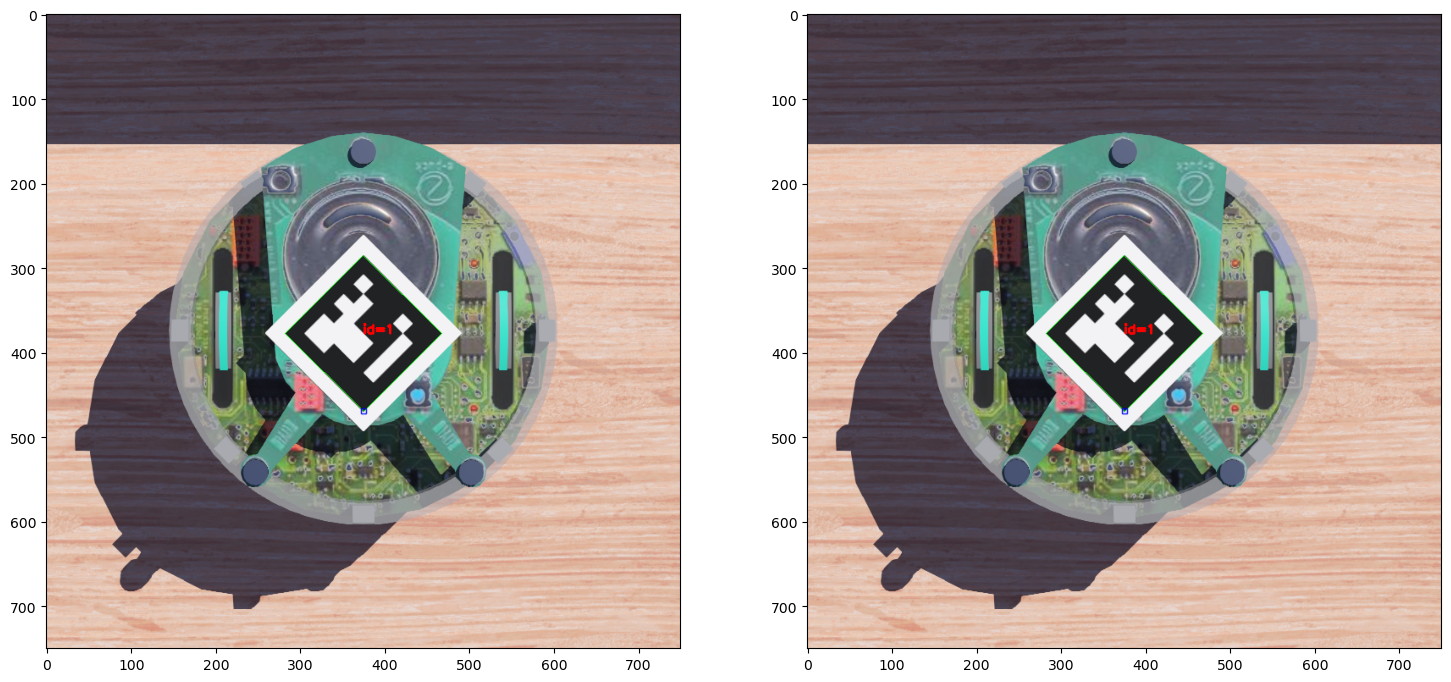

In [68]:
# Detect ArUco markers
# image is loaded with imread command 
bot_bgr = cv2.imread(ROBOT_FILE_NAME)
bot_rgb = cv2.cvtColor(bot_bgr, cv2.COLOR_BGR2RGB)
bot_aruco = bot_rgb

    
# Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Initialize the detector parameters using default values
parameters =  cv2.aruco.DetectorParameters_create()

# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(bot_aruco, dictionary, parameters=parameters)

heading = "v"
if max(markerCorners[0][0][0][0], markerCorners[0][0][1][0], markerCorners[0][0][2][0], markerCorners[0][0][3][0]) == markerCorners[0][0][0][0]:
    heading = ">"
if min(markerCorners[0][0][0][0], markerCorners[0][0][1][0], markerCorners[0][0][2][0], markerCorners[0][0][3][0]) == markerCorners[0][0][0][0]:
    heading = "<"
if min(markerCorners[0][0][0][1], markerCorners[0][0][1][1], markerCorners[0][0][2][1], markerCorners[0][0][3][1]) == markerCorners[0][0][0][1]:
    heading = "^"
if max(markerCorners[0][0][0][1], markerCorners[0][0][1][1], markerCorners[0][0][2][1], markerCorners[0][0][3][1]) == markerCorners[0][0][0][1]:
    heading = "v"

flipHeading = heading
if flip == True:
    if heading == "v":
        flipHeading = "^"
    if heading == "^":
        flipHeading = "v"
    if heading == ">":
        flipHeading = "<"
    if heading == "<":
        flipHeading = ">"
    
print(flipHeading)
bot_aruco = cv2.aruco.drawDetectedMarkers(bot_aruco, markerCorners, markerIds)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(bot_rgb)
ax2.imshow(bot_aruco)
plt.show()

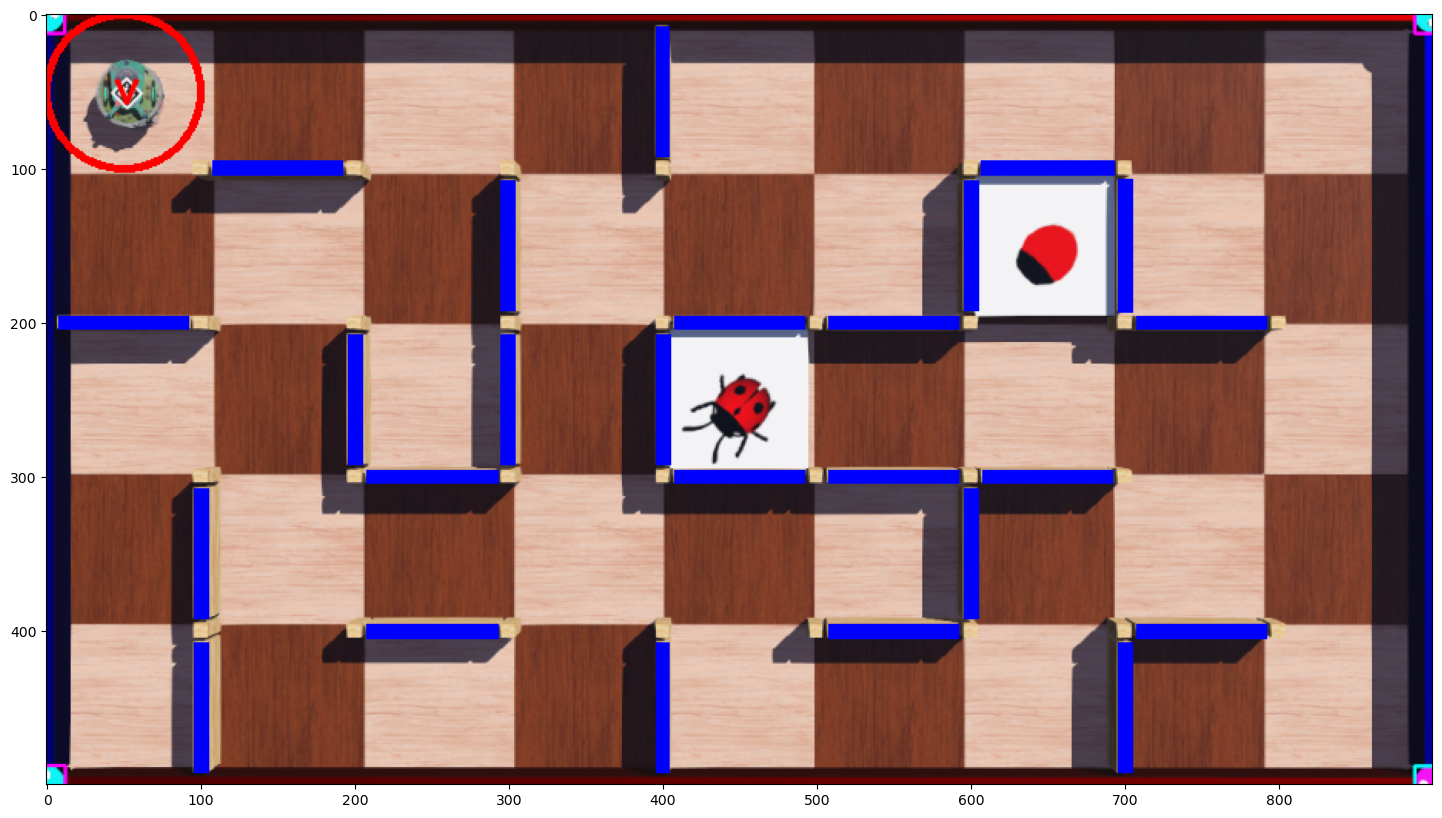

In [69]:
plt.figure(figsize = (18,10))

img_new_hsv = img_hsv

newLower = np.array([35, 0, 0])
newUpper = np.array([70, 255, 255])

maskR = cv2.inRange(img_hsv, newLower, newUpper)
maskingR = cv2.bitwise_and(img_new_hsv, img_new_hsv, mask=maskR)

contoursR = cv2.findContours(maskR, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoursR = contoursR[0] if len(contoursR) == 2 else contoursR[1]

bot_x_coords = []
bot_y_coords = []

for contour in contoursR:
    x,y,w,h = cv2.boundingRect(contour)
    bot_x_coords.append(x//100)
    bot_y_coords.append(y//100)

img_bot_pos = dst

startRow = most_frequent(bot_y_coords)
startCol = most_frequent(bot_x_coords)
centre_coords = (50+100*startCol,50+100*startRow)

RGB_RED = (255, 0, 0)

img_bot_pos = cv2.circle(img_bot_pos, centre_coords, 50, RGB_RED, 3)
img_bot_pos = cv2.putText(img_bot_pos, flipHeading, (centre_coords[0]-6, centre_coords[1]+7), cv2.FONT_HERSHEY_SIMPLEX, 1, RGB_RED, 2, cv2.LINE_AA, False)

plt.imshow(img_bot_pos)
plt.show()


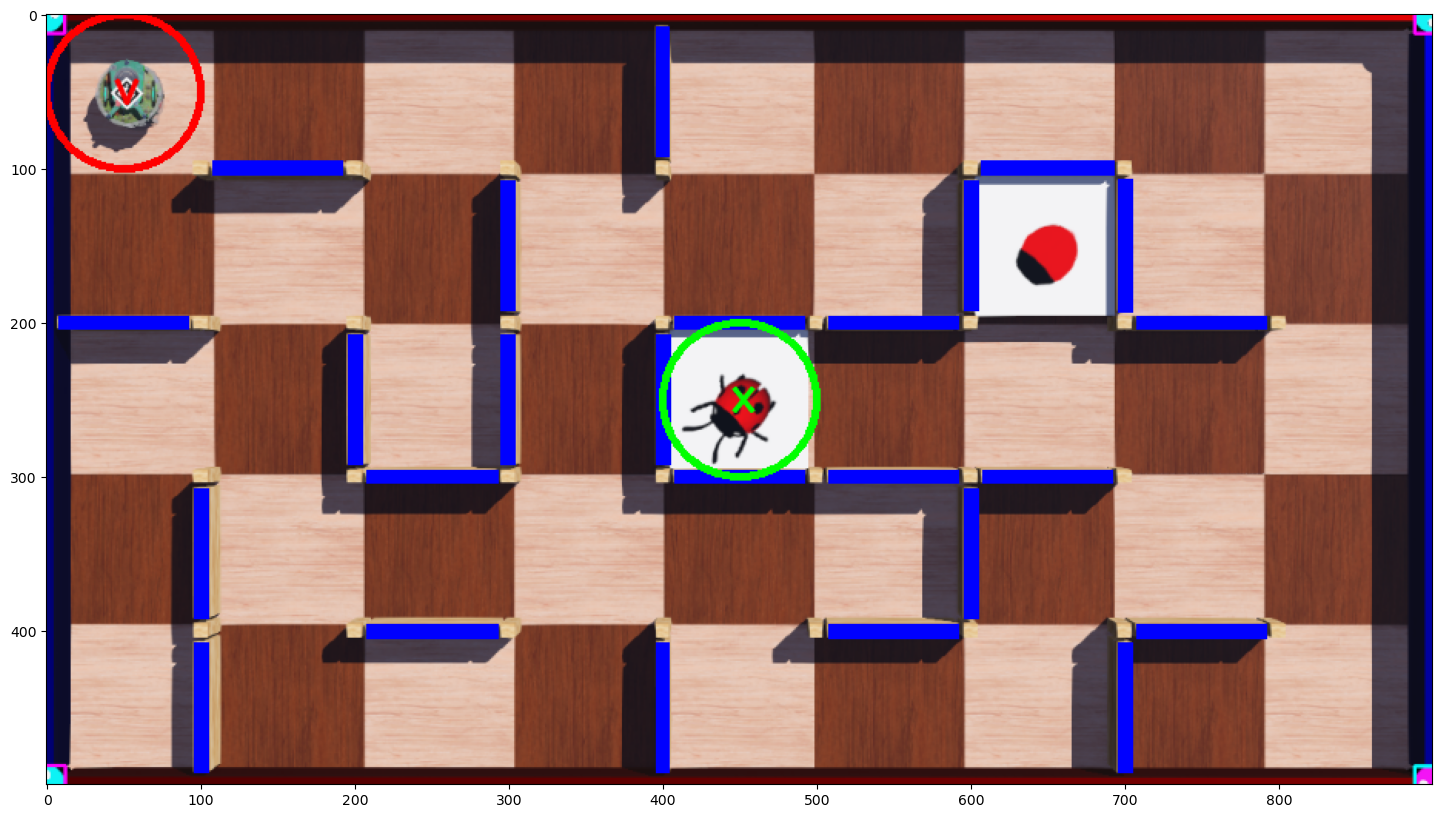

In [70]:
img1 = cv2.imread(IMAGE_LADYBUG_FILE_NAME,cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.cvtColor(img_bot_pos, cv2.COLOR_RGB2GRAY)

# Code modified from https://answers.opencv.org/question/175834/sift-feature-matches-coordinates/
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
     
good = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        good.append(m)


dst_pt = [ kp2[m.trainIdx].pt for m in good ]

numPoints = 0
sumX = 0
sumY = 0
for tup in dst_pt:
    sumX = sumX + tup[0]
    sumY = sumY + tup[1]
    numPoints = numPoints + 1


endRow = sumY/numPoints//100
endCol = sumX/numPoints//100        

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

RGB_GREEN = (0, 255, 0)
img_final_map = img_bot_pos
img_final_map = cv2.circle(img_final_map, (int(endCol)*100+50, int(endRow)*100+50), 50, RGB_GREEN, 3)
img_final_map = cv2.putText(img_final_map, 'x', (int(endCol)*100+50-6, int(endRow)*100+50+7), cv2.FONT_HERSHEY_SIMPLEX, 1, RGB_GREEN, 2, cv2.LINE_AA, False)

plt.figure(figsize = (18,10))
plt.imshow(img_final_map)
plt.show()

In [71]:
horizontalWalls = [[1, 1, 1, 1, 1, 1, 1, 1, 1],[0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1, 1]]
verticalWalls = [[1,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,0,0,1]]

for rectangle in rectangles:
    if (rectangle[2]-rectangle[0]) > 50:
        horizontalWalls[(50+(rectangle[1]+rectangle[3])//2)//100][((rectangle[0]+rectangle[2])//2)//100] = 1
    elif (rectangle[3] - rectangle[1]) > 50:
        verticalWalls[((rectangle[1]+rectangle[3])//2)//100][(50+(rectangle[0]+rectangle[2])//2)//100] = 1

        
f = open(MAP_FILE_NAME, 'w')

#writer = csv.writer(f)
        
ri = 0
while ri < 11:
    if ri % 2 == 0:
        rj = 0
        row = ' '
        while rj < 9:
            if horizontalWalls[ri//2][rj] == 1:
                row = row + '--- '
            elif horizontalWalls[ri//2][rj] == 0:
                row = row + '    '
            rj = rj + 1
        f.write(row)
        print(row)
    else:
        rk = 0
        row = ''
        while rk < 10:
            if verticalWalls[ri//2][rk] == 1:
                row = row + '|'
            elif verticalWalls[ri//2][rk] == 0:
                row = row + ' '
            
            if rk < 9:
                if ri//2 == startRow and rk == startCol:
                    row = row + ' ' + flipHeading + ' '
                elif ri//2 == endRow and rk == endCol:
                    row = row + ' x '
                else:
                    row = row + '   '
            
            
            rk = rk + 1
        
        f.write(row)
        print(row)
    
    if ri < 10:
        f.write('\n')
    
    ri = ri + 1

f.close()

 --- --- --- --- --- --- --- --- --- 
| v             |                   |
     ---                 ---         
|           |           |   |       |
 ---             --- ---     ---     
|       |   |   | x                 |
         ---     --- --- ---         
|   |                   |           |
         ---         ---     ---     
|   |           |           |       |
 --- --- --- --- --- --- --- --- --- 
